In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read in the data
data = pd.read_sql_table('features', 'sqlite:///../data/disaster_response.db')

data.shape

(26216, 40)

### Let's analyze the training set and classified messages

In [20]:
# create dataframe with labels and their counts
analyze_labels = (
                data.agg({col: 'sum' for col in data.columns[4:]})
                .to_frame()
                .rename_axis('label')
                .rename(columns={0: 'count'})
                .reset_index()
                .sort_values('count', ascending=False)
                .reset_index(drop=True)
                )

# show rate of response
analyze_labels

# cumsum and cumsum rate
analyze_labels['cumsum'] = analyze_labels['count'].cumsum()

analyze_labels['cumsum_rate'] = analyze_labels['cumsum'] / analyze_labels['count'].sum()

analyze_labels

,label,count,cumsum,cumsum_rate
0,related,20282,20282,0.243414
1,aid_related,10860,31142,0.373750
2,weather_related,7297,38439,0.461325
3,direct_report,5075,43514,0.522233
4,request,4474,47988,0.575927
5,other_aid,3446,51434,0.617285
6,food,2923,54357,0.652365
7,earthquake,2455,56812,0.681829
8,storm,2443,59255,0.711148
9,shelter,2314,61569,0.738920


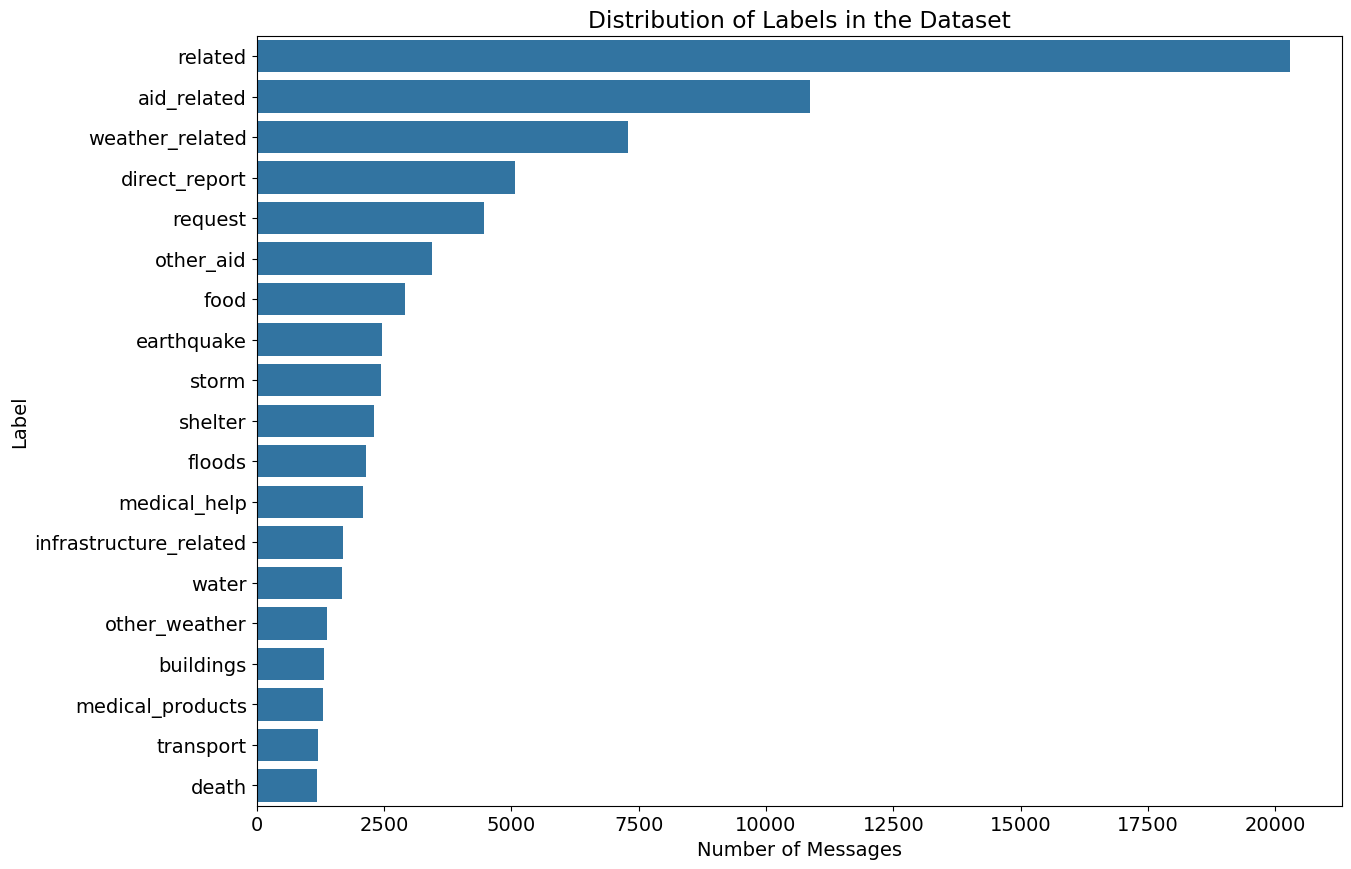

In [23]:
# set rc params font weight normal
plt.rcParams['font.weight'] = 'normal'

analyze_labels_20 = analyze_labels.head(19)

fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(data=analyze_labels_20, x='count', y='label')
ax.set_title('Distribution of Labels in the Dataset')
ax.set_xlabel('Number of Messages')
ax.set_ylabel('Label')
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='rate', y='label', data=analyze_labels, ax=ax)

plt.yticks(rotation=0, ha='right')  # adjust rotation and alignment here
plt.tight_layout()  # adjust subplot params so that subplot fits into the figure area
plt.xlabel('')
plt.ylabel('')